In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

baseline_log = pd.read_csv('/content/drive/MyDrive/dynamic_res/training_log_resnet18_baseline.csv')
dynamic_log = pd.read_csv('/content/drive/MyDrive/dynamic_res/training_log_resnet18_dynamic.csv')
inverted_log = pd.read_csv('/content/drive/MyDrive/dynamic_res/training_log_resnet18_inverted.csv')
precision_log = pd.read_csv('/content/drive/MyDrive/dynamic_res/training_log_resnet18_precision.csv')
progressive_log = pd.read_csv('/content/drive/MyDrive/dynamic_res/training_log_resnet18_progressive.csv')
drop_log = pd.read_csv('/content/drive/MyDrive/dynamic_res/training_log_resnet18_drop.csv')

baseline_test = baseline_log[baseline_log['epoch'] == 'FINAL_TEST'].iloc[0]
dynamic_test = dynamic_log[dynamic_log['epoch'] == 'FINAL_TEST_224'].iloc[0]
inverted_test = inverted_log[inverted_log['epoch'] == 'FINAL_TEST'].iloc[0]
precision_test = precision_log[precision_log['epoch'] == 'FINAL_TEST'].iloc[0]
progressive_test = progressive_log[progressive_log['epoch'] == 'FINAL_TEST'].iloc[0]
drop_test = drop_log[drop_log['epoch'] == 'FINAL_TEST_224'].iloc[0]

baseline_train = baseline_log[~baseline_log['epoch'].astype(str).str.contains('FINAL_TEST')].copy()
dynamic_train = dynamic_log[~dynamic_log['epoch'].astype(str).str.contains('FINAL_TEST')].copy()
inverted_train = inverted_log[~inverted_log['epoch'].astype(str).str.contains('FINAL_TEST')].copy()
precision_train = precision_log[~precision_log['epoch'].astype(str).str.contains('FINAL_TEST')].copy()
progressive_train = progressive_log[~progressive_log['epoch'].astype(str).str.contains('FINAL_TEST')].copy()
drop_train = drop_log[~drop_log['epoch'].astype(str).str.contains('FINAL_TEST')].copy()

baseline_train['epoch'] = baseline_train['epoch'].astype(int)
dynamic_train['epoch'] = dynamic_train['epoch'].astype(int)
inverted_train['epoch'] = inverted_train['epoch'].astype(int)
precision_train['epoch'] = precision_train['epoch'].astype(int)
progressive_train['epoch'] = progressive_train['epoch'].astype(int)
drop_train['epoch'] = drop_train['epoch'].astype(int)

print(f'baseline: {len(baseline_train)} epochs')
print(f'dynamic: {len(dynamic_train)} epochs')
print(f'inverted: {len(inverted_train)} epochs')
print(f"precision: {len(precision_log)} epochs")
print(f"progressive: {len(progressive_log)} epochs")
print(f"drop: {len(drop_train)} epochs")

baseline: 30 epochs
dynamic: 30 epochs
inverted: 30 epochs
precision: 31 epochs
progressive: 31 epochs
drop: 30 epochs


In [94]:
colors = {
    'Baseline': '#1E88E5',
    'Dynamic': '#E53935',
    'Inverted': '#43A047',
    'Precision': '#9C27B0',
    'Progressive': '#F9A825',
    'Drop': '#757575'
}

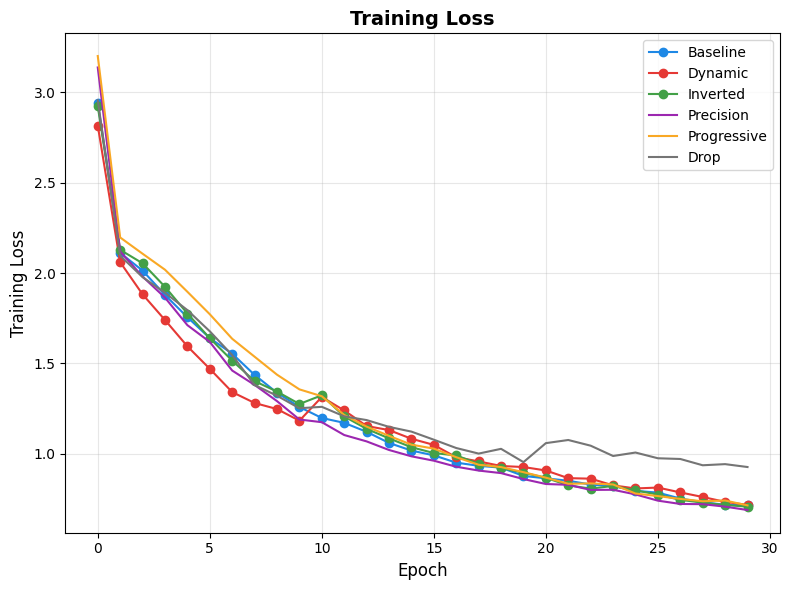

In [91]:
plt.figure(figsize=(8, 6))

plt.plot(baseline_train['epoch'], baseline_train['train_loss'], label='Baseline', marker='o', color=colors['Baseline'])
plt.plot(dynamic_train['epoch'], dynamic_train['train_loss'], label='Dynamic', marker='o', color=colors['Dynamic'])
plt.plot(inverted_train['epoch'], inverted_train['train_loss'], label='Inverted', marker='o', color=colors['Inverted'])
plt.plot(precision_train['epoch'], precision_train['train_loss'], label='Precision', color=colors['Precision'])
plt.plot(progressive_train['epoch'], progressive_train['train_loss'], label='Progressive', color=colors['Progressive'])
plt.plot(drop_train['epoch'], drop_train['train_loss'], label='Drop',  color=colors['Drop'])

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('Training Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

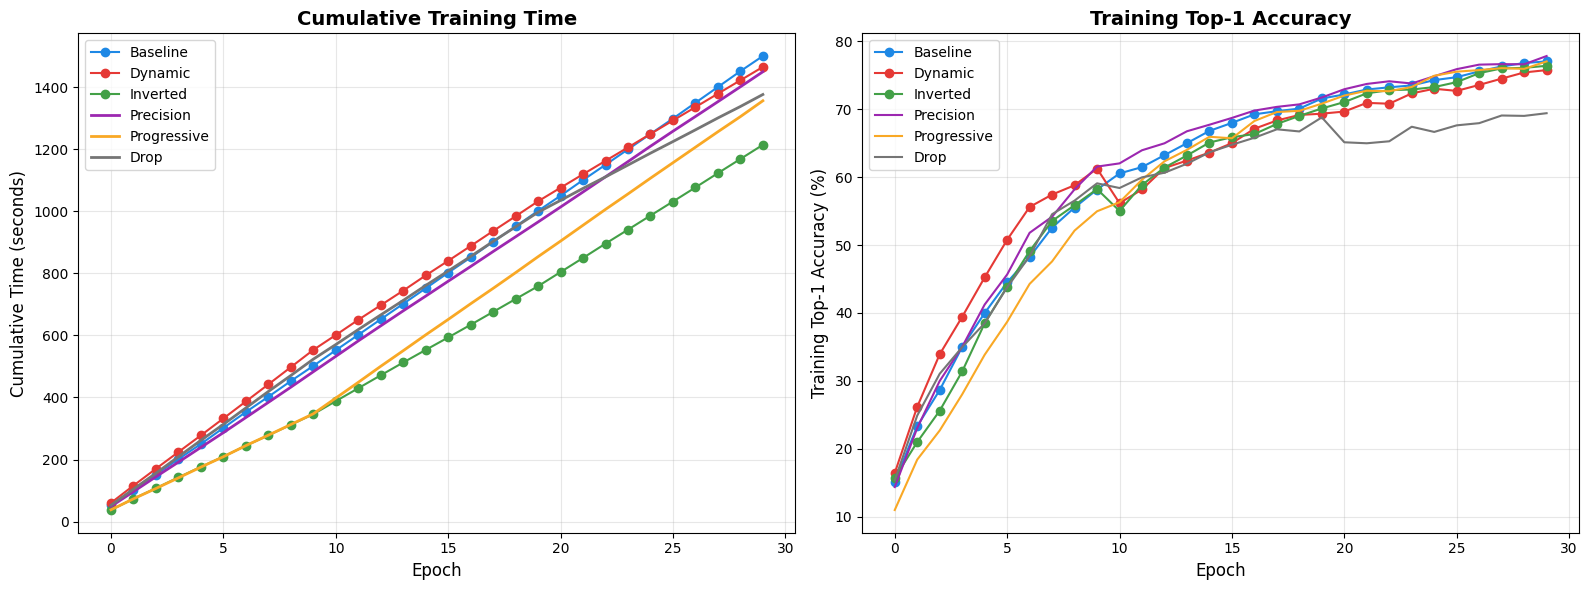

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Cumulative Training Time
baseline_cumtime = baseline_train['epoch_time'].cumsum()
precision_cumtime = precision_train['epoch_time'].cumsum()
progressive_cumtime = progressive_train['epoch_time'].cumsum()
drop_cumtime = drop_train['epoch_time'].cumsum()
dynamic_cumtime = dynamic_train['epoch_time'].cumsum()
inverted_cumtime = inverted_train['epoch_time'].cumsum()

ax1.plot(baseline_train['epoch'], baseline_cumtime, label='Baseline', marker='o', color=colors['Baseline'])
ax1.plot(dynamic_train['epoch'], dynamic_cumtime, label='Dynamic', marker='o', color=colors['Dynamic'])
ax1.plot(inverted_train['epoch'], inverted_cumtime, label='Inverted', marker='o', color=colors['Inverted'])
ax1.plot(precision_train['epoch'], precision_cumtime, label='Precision', linewidth=2, color=colors['Precision'])
ax1.plot(progressive_train['epoch'], progressive_cumtime, label='Progressive', linewidth=2, color=colors['Progressive'])
ax1.plot(drop_train['epoch'], drop_cumtime, label='Drop', linewidth=2, color=colors['Drop'])

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Cumulative Time (seconds)', fontsize=12)
ax1.set_title('Cumulative Training Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Training Top-1 Accuracy
ax2.plot(baseline_train['epoch'], baseline_train['train_top1'], label='Baseline', marker='o', color=colors['Baseline'])
ax2.plot(dynamic_train['epoch'], dynamic_train['train_top1'], label='Dynamic', marker='o', color=colors['Dynamic'])
ax2.plot(inverted_train['epoch'], inverted_train['train_top1'], label='Inverted', marker='o', color=colors['Inverted'])
ax2.plot(precision_train['epoch'], precision_train['train_top1'], label='Precision', color=colors['Precision'])
ax2.plot(progressive_train['epoch'], progressive_train['train_top1'], label='Progressive', color=colors['Progressive'])
ax2.plot(drop_train['epoch'], drop_train['train_top1'], label='Drop', color=colors['Drop'])

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Training Top-1 Accuracy (%)', fontsize=12)
ax2.set_title('Training Top-1 Accuracy', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

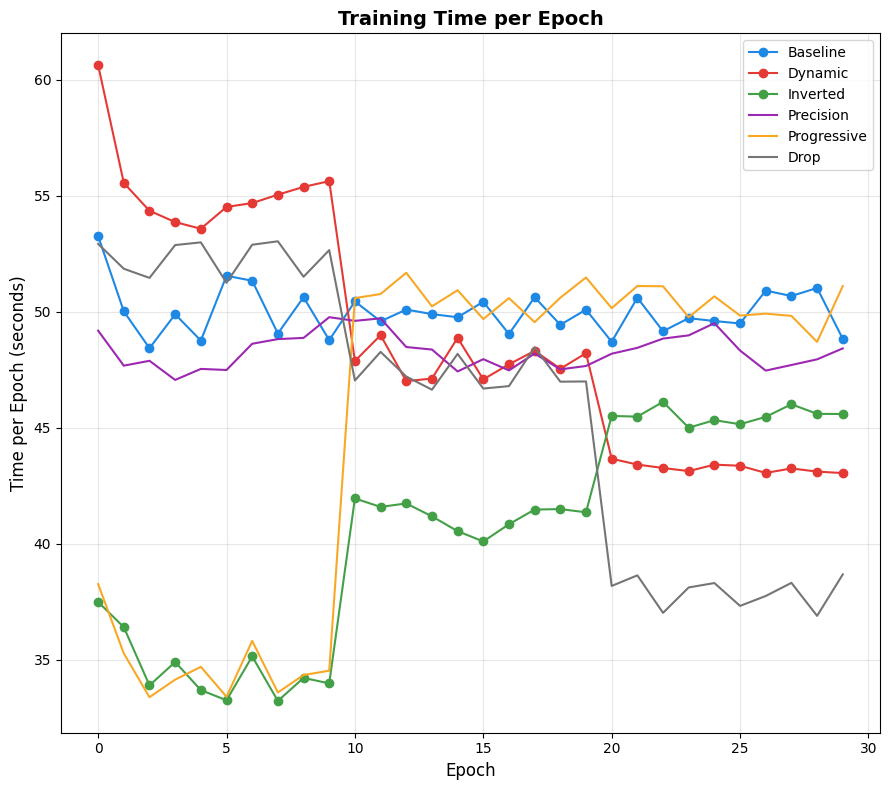

In [93]:
plt.figure(figsize=(9, 8))

plt.plot(baseline_train['epoch'], baseline_train['epoch_time'], label='Baseline', marker='o', color=colors['Baseline'])
plt.plot(dynamic_train['epoch'], dynamic_train['epoch_time'], label='Dynamic', marker='o', color=colors['Dynamic'])
plt.plot(inverted_train['epoch'], inverted_train['epoch_time'], label='Inverted', marker='o', color=colors['Inverted'])
plt.plot(precision_train['epoch'], precision_train['epoch_time'], label='Precision', color=colors['Precision'])
plt.plot(progressive_train['epoch'], progressive_train['epoch_time'], label='Progressive', color=colors['Progressive'])
plt.plot(drop_train['epoch'], drop_train['epoch_time'], label='Drop', color=colors['Drop'])

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Time per Epoch (seconds)', fontsize=12)
plt.title('Training Time per Epoch', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

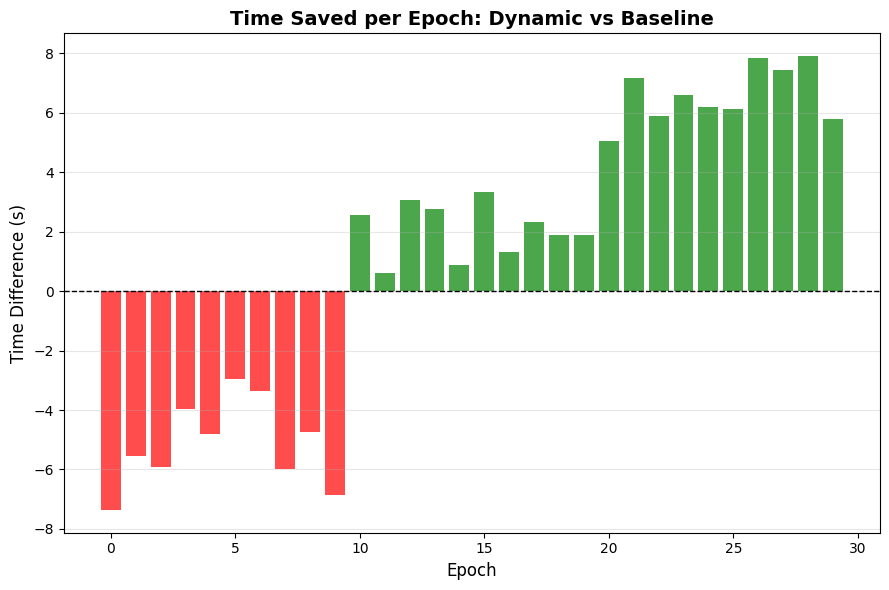

In [74]:
plt.figure(figsize=(9, 6))

time_diff_dynamic = baseline_train['epoch_time'] - dynamic_train['epoch_time']
colors_dynamic = ['green' if x > 0 else 'red' for x in time_diff_dynamic]

plt.bar(baseline_train['epoch'], time_diff_dynamic, alpha=0.7, color=colors_dynamic)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Time Difference (s)', fontsize=12)
plt.title('Time Saved per Epoch: Dynamic vs Baseline', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

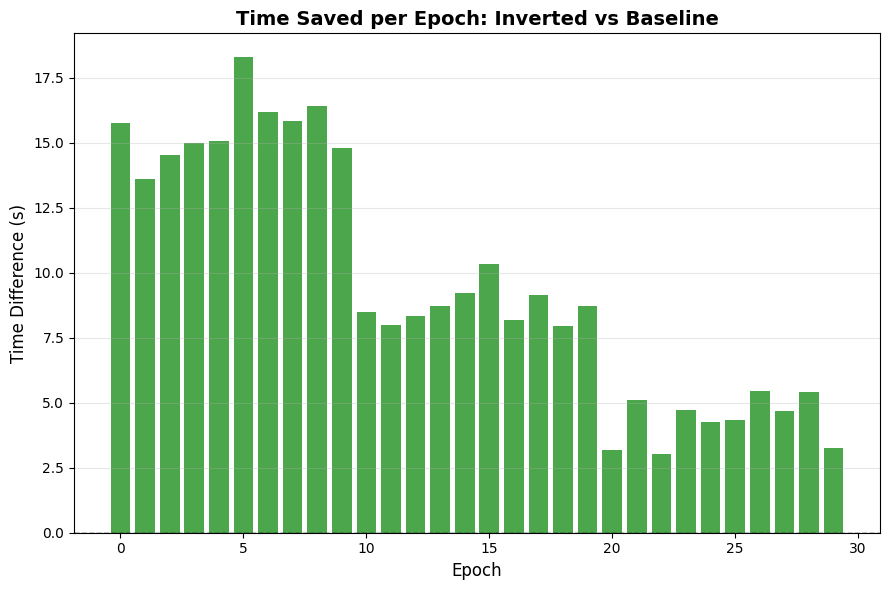

In [75]:
plt.figure(figsize=(9, 6))

time_diff_inverted = baseline_train['epoch_time'] - inverted_train['epoch_time']
colors_inverted = ['green' if x > 0 else 'red' for x in time_diff_inverted]

plt.bar(baseline_train['epoch'], time_diff_inverted, alpha=0.7, color=colors_inverted)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Time Difference (s)', fontsize=12)
plt.title('Time Saved per Epoch: Inverted vs Baseline', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

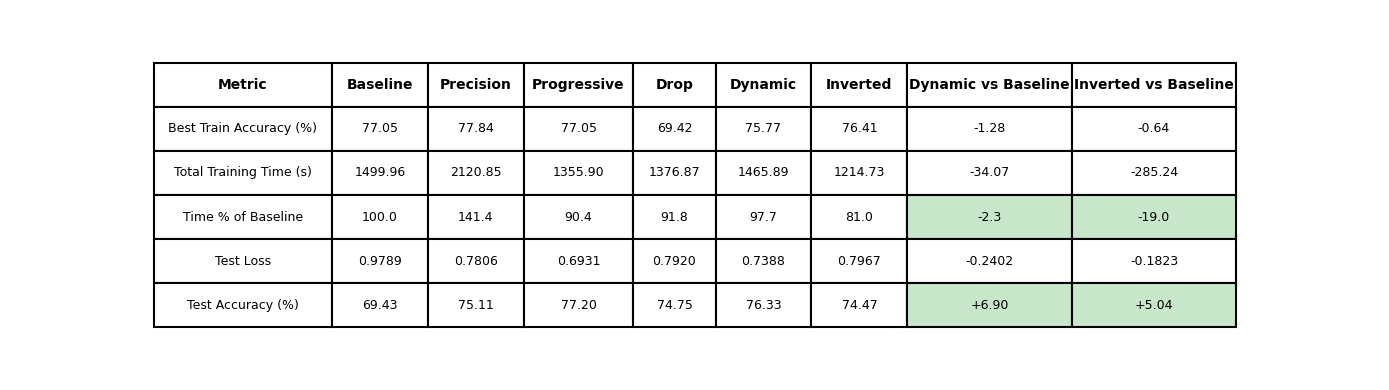

In [67]:
# calculate metrics
precision_time_pct = (precision_test['epoch_time'] / baseline_test['epoch_time']) * 100
progressive_time_pct = (progressive_test['epoch_time'] / baseline_test['epoch_time']) * 100
dynamic_time_pct = (dynamic_test['epoch_time'] / baseline_test['epoch_time']) * 100
inverted_time_pct = (inverted_test['epoch_time'] / baseline_test['epoch_time']) * 100
drop_time_pct = (drop_test['epoch_time'] / baseline_test['epoch_time']) * 100

baseline_avg = baseline_train['epoch_time'].mean()
precision_avg = precision_train['epoch_time'].mean()
progressive_avg = progressive_train['epoch_time'].mean()
dynamic_avg = dynamic_train['epoch_time'].mean()
inverted_avg = inverted_train['epoch_time'].mean()
drop_avg = drop_train['epoch_time'].mean()

# summary dataframe with reordered rows
summary_data = {
    'Metric': [
        'Best Train Accuracy (%)',
        'Total Training Time (s)',
        'Time % of Baseline',
        'Test Loss',
        'Test Accuracy (%)'
    ],
    'Baseline': [
        f"{baseline_train['train_top1'].max():.2f}",
        f"{baseline_test['epoch_time']:.2f}",
        "100.0",
        f"{baseline_test['train_loss']:.4f}",
        f"{baseline_test['train_top1']:.2f}"
    ],
    'Precision': [
        f"{precision_train['train_top1'].max():.2f}",
        f"{precision_test['epoch_time']:.2f}",
        f"{precision_time_pct:.1f}",
        f"{precision_test['train_loss']:.4f}",
        f"{precision_test['train_top1']:.2f}"
    ],
    'Progressive': [
        f"{progressive_train['train_top1'].max():.2f}",
        f"{progressive_test['epoch_time']:.2f}",
        f"{progressive_time_pct:.1f}",
        f"{progressive_test['train_loss']:.4f}",
        f"{progressive_test['train_top1']:.2f}"
    ],
    'Drop': [
        f"{drop_train['train_top1'].max():.2f}",
        f"{drop_test['epoch_time']:.2f}",
        f"{drop_time_pct:.1f}",
        f"{drop_test['train_loss']:.4f}",
        f"{drop_test['train_top1']:.2f}"
    ],
    'Dynamic': [
        f"{dynamic_train['train_top1'].max():.2f}",
        f"{dynamic_test['epoch_time']:.2f}",
        f"{dynamic_time_pct:.1f}",
        f"{dynamic_test['train_loss']:.4f}",
        f"{dynamic_test['train_top1']:.2f}"
    ],
    'Inverted': [
        f"{inverted_train['train_top1'].max():.2f}",
        f"{inverted_test['epoch_time']:.2f}",
        f"{inverted_time_pct:.1f}",
        f"{inverted_test['train_loss']:.4f}",
        f"{inverted_test['train_top1']:.2f}"
    ],
    'Dynamic vs Baseline': [
        f"{dynamic_train['train_top1'].max() - baseline_train['train_top1'].max():+.2f}",
        f"{dynamic_test['epoch_time'] - baseline_test['epoch_time']:+.2f}",
        f"{dynamic_time_pct - 100:+.1f}",
        f"{dynamic_test['train_loss'] - baseline_test['train_loss']:+.4f}",
        f"{dynamic_test['train_top1'] - baseline_test['train_top1']:+.2f}"
    ],
    'Inverted vs Baseline': [
        f"{inverted_train['train_top1'].max() - baseline_train['train_top1'].max():+.2f}",
        f"{inverted_test['epoch_time'] - baseline_test['epoch_time']:+.2f}",
        f"{inverted_time_pct - 100:+.1f}",
        f"{inverted_test['train_loss'] - baseline_test['train_loss']:+.4f}",
        f"{inverted_test['train_top1'] - baseline_test['train_top1']:+.2f}"
    ]
}

summary_df = pd.DataFrame(summary_data)


fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center', colWidths=[0.13, 0.07, 0.07, 0.08, 0.06, 0.07, 0.07, 0.12, 0.12])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.2)

for i in range(len(summary_df) + 1):
    for j in range(len(summary_df.columns)):
        cell = table[(i, j)]
        cell.set_facecolor('white')
        cell.set_edgecolor('black')
        cell.set_linewidth(1.5)

        if i == 0:
            cell.set_text_props(weight='bold', fontsize=10)


highlight_cells = [(5, 7),  (3, 7),  (5, 8), (3, 8)]

for row, col in highlight_cells:
    table[(row, col)].set_facecolor('#C8E6C9')  # light green

plt.tight_layout()
plt.show()